# PROBLRM STATEMENT : Predict home price using linear regression

In [2]:
! pip install joblib

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings

In [4]:
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0.5, 0, 'Price')

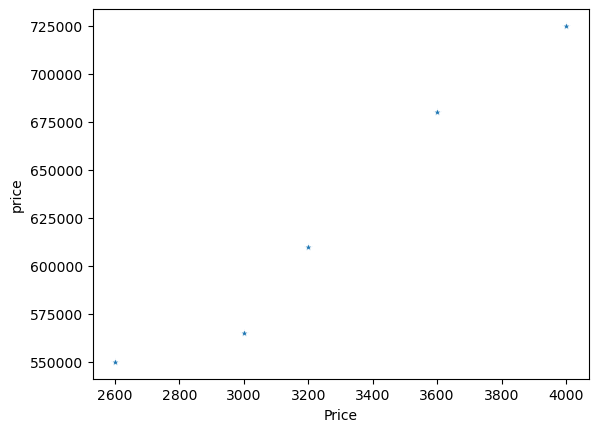

In [6]:
sns.scatterplot(x=df['area'],y=df['price'],marker='*')
plt.xlabel('Area')
plt.xlabel('Price')

In [7]:
y = df[['price']] #target ie what we have to predict 
X = df[['area']] #feature using which we can train the model 

In [8]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [9]:
reg.predict([[3300]])

array([[628715.75342466]])

In [10]:
reg.coef_

array([[135.78767123]])

In [11]:
reg.intercept_

array([180616.43835616])

In [65]:
reg.

AttributeError: 'LinearRegression' object has no attribute 'accuracy'

# Y = m * X + b (m is coefficient and b is intercept)

In [13]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

(1) Prediction for home with area = 5000sq

In [15]:
reg.predict([[5000]])

array([[859554.79452055]])

(2) Generate CSV file with list of home price predictions

In [17]:
area_pdf = pd.read_csv("areas.csv")
area_pdf.head(3)

,area
0,1000
1,1500
2,2300


In [18]:
pdf_predicted = reg.predict(area_pdf)
pdf_predicted

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [19]:
area_pdf["Predicted Prices"] = pdf_predicted
area_pdf

,area,Predicted Prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [20]:
area_pdf.to_csv('prediction.csv')

Prediction graph is 

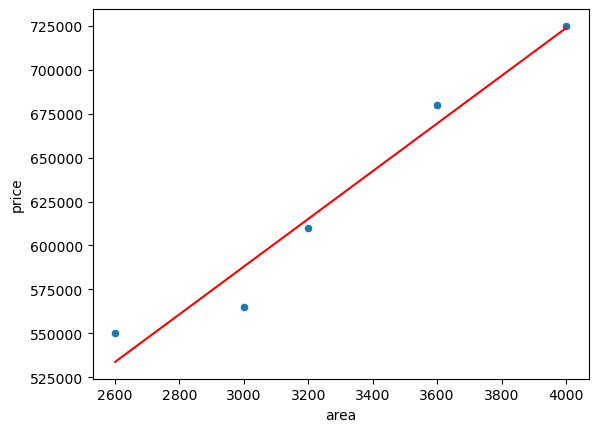

In [22]:
sns.scatterplot(x=df.area,y=df.price)
plt.plot(df.area,reg.predict(df[['area']]),color="red")

# Pickle Method

In [24]:
import pickle

In [25]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [26]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)          

In [27]:
mp.predict([[5000]])

array([[859554.79452055]])

In [28]:
mp.predict([[60000]])

array([[8327876.71232877]])

# Joblib Method

In [30]:
import joblib

In [31]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [32]:
beep = joblib.load('model_joblib')

In [33]:
beep.predict([[5000]])

array([[859554.79452055]])